In [14]:
from matplotlib import pyplot as plt  # 展示图片
import numpy as np  # 数值处理
import cv2  # opencv库
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # 回归分析

In [15]:
def read_image(img_path):
    """
    读取图片，图片是以 np.array 类型存储
    :param img_path: 图片的路径以及名称
    :return: img np.array 类型存储
    """
    # 读取图片
    img = cv2.imread(img_path) 
    
    # 如果图片是三通道，采用 matplotlib 展示图像时需要先转换通道
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    return img

In [16]:
def plot_image(image, image_title, is_axis=False):
    """
    展示图像
    :param image: 展示的图像，一般是 np.array 类型
    :param image_title: 展示图像的名称
    :param is_axis: 是否需要关闭坐标轴，默认展示坐标轴
    :return:
    """
    # 展示图片
    plt.imshow(image)
    
    # 关闭坐标轴,默认关闭
    if not is_axis:
        plt.axis('off')

    # 展示受损图片的名称
    plt.title(image_title)

    # 展示图片
    plt.show()

In [17]:
def save_image(filename, image):
    """
    将np.ndarray 图像矩阵保存为一张 png 或 jpg 等格式的图片
    :param filename: 图片保存路径及图片名称和格式
    :param image: 图像矩阵，一般为np.array
    :return:
    """
    # np.copy() 函数创建一个副本。
    # 对副本数据进行修改，不会影响到原始数据，它们物理内存不在同一位置。
    img = np.copy(image)
    
    # 从给定数组的形状中删除一维的条目
    img = img.squeeze()
    
    # 将图片数据存储类型改为 np.uint8
    if img.dtype == np.double:
        
        # 若img数据存储类型是 np.double ,则转化为 np.uint8 形式
        img = img * np.iinfo(np.uint8).max
        
        # 转换图片数组数据类型
        img = img.astype(np.uint8)
    
    # 将 RGB 方式转换为 BGR 方式
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    # 生成图片
    cv2.imwrite(filename, img)

In [18]:
def normalization(image):
    """
    将数据线性归一化
    :param image: 图片矩阵，一般是np.array 类型 
    :return: 将归一化后的数据，在（0,1）之间
    """
    # 获取图片数据类型对象的最大值和最小值
    info = np.iinfo(image.dtype)
    
    # 图像数组数据放缩在 0-1 之间
    return image.astype(np.double) / info.max

In [19]:
def noise_mask_image(img, noise_ratio=[0.8,0.4,0.6]):
    """
    根据题目要求生成受损图片
    :param img: cv2 读取图片,而且通道数顺序为 RGB
    :param noise_ratio: 噪声比率，类型是 List,，内容:[r 上的噪声比率,g 上的噪声比率,b 上的噪声比率]
                        默认值分别是 [0.8,0.4,0.6]
    :return: noise_img 受损图片, 图像矩阵值 0-1 之间，数据类型为 np.array,
             数据类型对象 (dtype): np.double, 图像形状:(height,width,channel),通道(channel) 顺序为RGB
    """
    # 受损图片初始化
    noise_img = None
    # -------------实现受损图像答题区域-----------------
    height = img.shape[0]
    width = img.shape[1]
    channel = img.shape[2]
    unnoise_ratio = [1 - ratio for ratio in noise_ratio]
    noise_ratioRGB = list(zip(noise_ratio, unnoise_ratio))
    noise = np.empty((height, width, channel))
    for h in range(height):
        noise_img_rowRGB = np.zeros(shape = (channel, width))
        for c in range(channel):
            noise_img_rowRGB[c] = np.random.choice(a = np.array([0, 1]), size = width, p = list(noise_ratioRGB[c]))
        noise[h] = noise_img_rowRGB.T
    noise_img = img * noise    
    
    # -----------------------------------------------

    return noise_img


In [20]:
def get_noise_mask(noise_img):
    """
    获取噪声图像，一般为 np.array
    :param noise_img: 带有噪声的图片
    :return: 噪声图像矩阵
    """
    # 将图片数据矩阵只包含 0和1,如果不能等于 0 则就是 1。
    return np.array(noise_img != 0, dtype='double')

In [21]:
def compute_error(res_img, img):
    """
    计算恢复图像 res_img 与原始图像 img 的 2-范数
    :param res_img:恢复图像 
    :param img:原始图像 
    :return: 恢复图像 res_img 与原始图像 img 的2-范数
    """
    # 初始化
    error = 0.0
    
    # 将图像矩阵转换成为np.narray
    res_img = np.array(res_img)
    img = np.array(img)
    
    # 如果2个图像的形状不一致，则打印出错误结果，返回值为 None
    if res_img.shape != img.shape:
        print("shape error res_img.shape and img.shape %s != %s" % (res_img.shape, img.shape))
        return None
    
    # 计算图像矩阵之间的评估误差
    error = np.sqrt(np.sum(np.power(res_img - img, 2)))
    
    return round(error,3)

In [22]:
#from skimage.measure import compare_ssim as ssim
#from scipy import spatial

#def calc_ssim(img, img_noise):
    #"""
    #计算图片的结构相似度
    #:param img: 原始图片， 数据类型为 ndarray, shape 为[长, 宽, 3]
    #:param img_noise: 噪声图片或恢复后的图片，
                      #数据类型为 ndarray, shape 为[长, 宽, 3]
    #:return:
    #"""
    #return ssim(img, img_noise,
                #multichannel=True,
                #data_range=img_noise.max() - img_noise.min())

#def calc_csim(img, img_noise):
    #"""
    #计算图片的 cos 相似度
    #:param img: 原始图片， 数据类型为 ndarray, shape 为[长, 宽, 3]
    #:param img_noise: 噪声图片或恢复后的图片，
                      #数据类型为 ndarray, shape 为[长, 宽, 3]
    #:return:
    #"""
    #img = img.reshape(-1)
    #img_noise = img_noise.reshape(-1)
    #return 1 - spatial.distance.cosine(img, img_noise)

In [65]:
def restore_image(noise_img, size=4):
    """
    使用 你最擅长的算法模型 进行图像恢复。
    :param noise_img: 一个受损的图像
    :param size: 输入区域半径，长宽是以 size*size 方形区域获取区域, 默认是 4
    :return: res_img 恢复后的图片，图像矩阵值 0-1 之间，数据类型为 np.array,
            数据类型对象 (dtype): np.double, 图像形状:(height,width,channel), 通道(channel) 顺序为RGB
    """
    # 恢复图片初始化，首先 copy 受损图片，然后预测噪声点的坐标后作为返回值。
    res_img = np.copy(noise_img)

    # 获取噪声图像
    noise_mask = get_noise_mask(noise_img)

    # -------------实现图像恢复代码答题区域----------------------------
    height = noise_mask.shape[0]
    width = noise_mask.shape[1]
    channel = noise_mask.shape[2]
    
    model = LinearRegression()
    for c in range(channel):
        noise_maskC = noise_mask[:, :, c]
        for x in range(height):
            for y in range(width):
                if noise_maskC[x][y] != 0:
                    continue
                input = []
                output = []
                expandSize = size
                num = 0
                while num == 0:
                    num = 0
                    minRow = max(0, x - expandSize // 2)
                    maxRow = min(width, x + expandSize // 2)
                    minCol = max(0, y - expandSize // 2)
                    maxCol = min(height, y + expandSize // 2)
                    targetMatrix = noise_maskC[minRow : maxRow, minCol : maxCol]
                    for i in range(maxRow - minRow):
                        for j in range(maxCol - minCol):
                            if targetMatrix[i][j] != 0:
                                num += 1
                                input.append([i, j])
                                output.append([res_img[minRow + i][minCol + j][c]])
                    if num != 0:
                        model.fit(input, output)
                        res_img[x][y][c] = max(0, min(model.predict([[x - minRow, y - minCol]])[0], 1))
                    expandSize += 1
    
    # model = LinearRegression()
    # for c in range(channel):
    #     noise_maskC = noise_mask[:, :, c]
    #     noise_imgC = noise_img[:, :, c]
    #     for x in range(height):
    #         for y in range(width):
    #             if noise_maskC[x][y] != 0:
    #                 continue
    #             minRow = max(0, x - size // 2)
    #             maxRow = min(width, x + size // 2)
    #             minCol = max(0, y - size // 2)
    #             maxCol = min(height, y + size // 2)
    #             input = []
    #             output = []
    #             for i in range(minRow, maxRow):
    #                 for j in range(minCol, maxCol):
    #                     if i != x and j != y:
    #                         input.append([i - minRow, j - minCol])
    #                         output.append([noise_imgC[i][j]])
    #             model.fit(input, output)
    #             predictResult = model.predict([[x - minRow, y - minCol]])[0]
    #             res_img[x][y][c] = max(min(predictResult, 1), 0)


    # for c in range(channel):
    #         noise_maskC = noise_mask[:, :, c]
    #         for x in range(height):
    #             for y in range(width):
    #                 if noise_maskC[x][y] != 0:
    #                     continue
    #                 expandSize = size
    #                 num = 0
    #                 while num == 0:
    #                     sum = 0.0
    #                     num = 0
    #                     minRow = max(0, x - expandSize // 2)
    #                     maxRow = min(width, x + expandSize // 2)
    #                     minCol = max(0, y - expandSize // 2)
    #                     maxCol = min(height, y + expandSize // 2)
    #                     targetMatrix = noise_maskC[minRow : maxRow, minCol : maxCol]
    #                     for i in range(maxRow - minRow):
    #                         for j in range(maxCol - minCol):
    #                             if targetMatrix[i][j] != 0:
    #                                 num += 1
    #                                 sum += res_img[minRow + i][minCol + j][c]
    #                     if num != 0:
    #                         res_img[x][y][c] = sum / num
    #                     expandSize += 1
    # ---------------------------------------------------------------

    return res_img

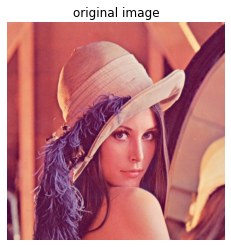

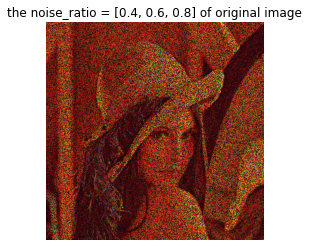

In [66]:
# 原始图片
# 加载图片的路径和名称
img_path = 'input.bmp'

# 读取原始图片
img = read_image(img_path)

# 展示原始图片
plot_image(image=img, image_title="original image")

# 生成受损图片
# 图像数据归一化
nor_img = normalization(img)

# 每个通道数不同的噪声比率
noise_ratio = [0.4, 0.6, 0.8]

# 生成受损图片
noise_img = noise_mask_image(nor_img, noise_ratio)

if noise_img is not None:
    # 展示受损图片
    plot_image(image=noise_img, image_title="the noise_ratio = %s of original image"%noise_ratio)

    # 恢复图片
    res_img = restore_image(noise_img)
    
    # 计算恢复图片与原始图片的误差
    print("恢复图片与原始图片的评估误差: ", compute_error(res_img, nor_img))
    #print("恢复图片与原始图片的 SSIM 相似度: ", calc_ssim(res_img, nor_img))
    #print("恢复图片与原始图片的 Cosine 相似度: ", calc_csim(res_img, nor_img))

    # 展示恢复图片
    plot_image(image=res_img, image_title="restore image")

    # 保存恢复图片
    save_image('res_' + img_path, res_img)
else:
    # 未生成受损图片
    print("返回值是 None, 请生成受损图片并返回!")
    